# A First PGM

Below is a graphical representation of the combination:

${\rm Pr}(R_{\rm obs}|R_{\rm obs},\sigma) \; {\rm Pr}(R_{\rm true}|\mu,S)$

In generating mock data $R_{{\rm obs},k}$ for galaxies $k$ we needed to:

* Assume values $\mu$ and $S$ for the intrinsic size distribution
* Generate intrinsic sizes $R_{{\rm obs},k}$ for each galaxy
* Add noise, generating $R_{\rm obs}$

The "Probabilistic Graphical Model" below illustrates this procedure, and also the probability distributions in the expression above - plus the implied ones for the population parameters.

In [1]:
# !pip install --upgrade daft
import daft

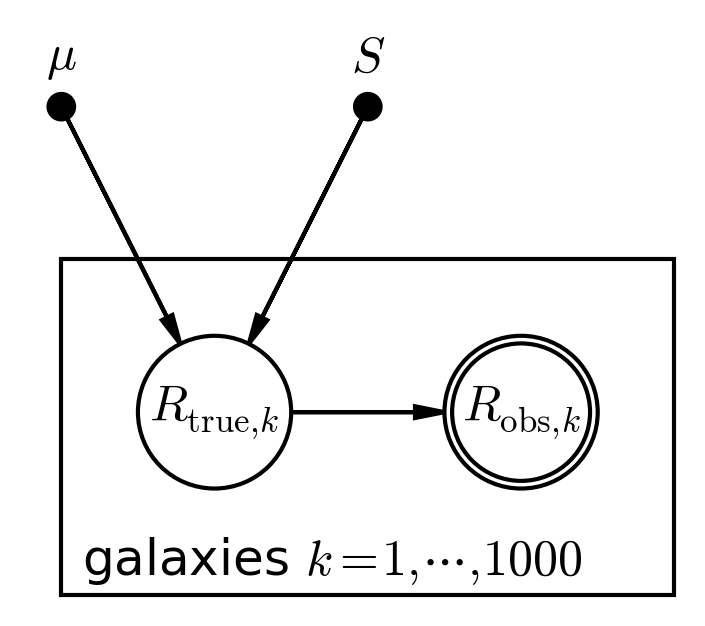

In [9]:
# Instantiate a PGM.
pgm = daft.PGM([2.3, 2.05], origin=[0.3, 0.3], grid_unit=2.6, node_unit=1.3, observed_style="inner")

# Hierarchical parameters.
pgm.add_node(daft.Node("mu", r"$\mu$", 0.5, 2, fixed=True))
pgm.add_node(daft.Node("S", r"$S$", 1.5, 2, fixed=True))

# Latent variable:
pgm.add_node(daft.Node("Rtrue", r"$R_{{\rm true},k}$", 1, 1))

# Data:
pgm.add_node(daft.Node("Robs", r"$R_{{\rm obs},k}$", 2, 1, observed=True))

# Add in the edges.
pgm.add_edge("mu", "Rtrue")
pgm.add_edge("S", "Rtrue")
pgm.add_edge("Rtrue", "Robs")

# And a plate.
pgm.add_plate(daft.Plate([0.5, 0.5, 2, 1], label=r"galaxies $k = 1, \cdots, 1000$",
    shift=-0.1))

# Render and save.
pgm.render()
pgm.figure.savefig("samplingdistributions.png", dpi=300)

# Display:
from IPython.display import Image
Image(filename="samplingdistributions.png")